In [1]:
print("Hello, John")


Hello, John


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Set up path to CSV
DATA_DIR = Path("output")
CSV_PATH = DATA_DIR / "etf_regime_summary.csv"
print(CSV_PATH)

output/etf_regime_summary.csv


In [3]:
CSV_PATH.exists()


False

In [4]:
import os
os.listdir()

['.ipynb_checkpoints',
 'ai',
 'data',
 'debug_retirement_simulation.ipynb',
 'features',
 'regimes',
 'simulation',
 'Untitled.ipynb',
 'utils',
 '__init__.py',
 '__pycache__']

In [5]:
from pathlib import Path

CSV_PATH = Path("output/etf_regime_summary.csv")
CSV_PATH.exists()  # Should now return True

False

In [6]:
from pathlib import Path

CSV_PATH = Path("/mnt/c/Users/JohnFriedrich/OneDrive/Scripts/Python/RetirementEngine/output/etf_regime_summary.csv")
CSV_PATH.exists()

True

In [7]:
import pandas as pd

raw = pd.read_csv(CSV_PATH, header=None)
raw.head(6)

,0,1,2,3,4,5,6,7,8
0,SP500,SP500,SP500,VIX,VIX,VIX,10Y,10Y,10Y
1,mean,std,count,mean,std,count,mean,std,count
2,0.00037187645226793544,0.007229047047534224,125,0.02757004033865504,0.36485778734,125,-0.0014036135534965196,0.009979041649077555,125
3,0.0004907886515918818,0.012915215132989252,1509,0.0030283392360296417,0.1143817531869525,1509,1.1727961667940733e-05,0.010570750738421049,1509


In [8]:
# Load raw CSV
raw = pd.read_csv(CSV_PATH, header=0)

# Create MultiIndex for columns
raw.columns = pd.MultiIndex.from_tuples([
    tuple(col.strip().replace(")", "").split(" (")) for col in raw.columns
])

# Preview reshaped DataFrame
raw.head()

,SP500,SP500.1,SP500.2,VIX,VIX.1,VIX.2,10Y,10Y.1,10Y.2
0,mean,std,count,mean,std,count,mean,std,count
1,0.00037187645226793544,0.007229047047534224,125,0.02757004033865504,0.36485778734,125,-0.0014036135534965196,0.009979041649077555,125
2,0.0004907886515918818,0.012915215132989252,1509,0.0030283392360296417,0.1143817531869525,1509,1.1727961667940733e-05,0.010570750738421049,1509


In [9]:
raw = pd.read_csv(CSV_PATH, header=[0,1])
raw.head()

SP500                       VIX                       10Y            \
       mean       std count      mean       std count      mean       std   
0  0.000372  0.007229   125  0.027570  0.364858   125 -0.001404  0.009979   
1  0.000491  0.012915  1509  0.003028  0.114382  1509  0.000012  0.010571   

         
  count  
0   125  
1  1509

In [10]:
raw = pd.read_csv(CSV_PATH, header=[0, 1])
raw.head()


SP500                       VIX                       10Y            \
       mean       std count      mean       std count      mean       std   
0  0.000372  0.007229   125  0.027570  0.364858   125 -0.001404  0.009979   
1  0.000491  0.012915  1509  0.003028  0.114382  1509  0.000012  0.010571   

         
  count  
0   125  
1  1509

In [11]:
raw.index = ["Expansion", "Recession"]

In [12]:
mean_matrix = raw.xs("mean", axis=1, level=1)
std_matrix = raw.xs("std", axis=1, level=1)
count_matrix = raw.xs("count", axis=1, level=1)

In [13]:
mean_matrix

,SP500,VIX,10Y
Expansion,0.000372,0.027570,-0.001404
Recession,0.000491,0.003028,0.000012


In [14]:
raw = pd.read_csv(CSV_PATH, header=[0, 1])


In [15]:
raw.head()


SP500                       VIX                       10Y            \
       mean       std count      mean       std count      mean       std   
0  0.000372  0.007229   125  0.027570  0.364858   125 -0.001404  0.009979   
1  0.000491  0.012915  1509  0.003028  0.114382  1509  0.000012  0.010571   

         
  count  
0   125  
1  1509

In [16]:
mean_matrix = raw.xs("mean", axis=1, level=1)

In [17]:
mean_matrix

,SP500,VIX,10Y
0,0.000372,0.027570,-0.001404
1,0.000491,0.003028,0.000012


In [18]:
import pandas as pd

# Define the matrix manually (or use raw.xs if already loaded)
mean_matrix = pd.DataFrame({
    "SP500": [0.000372, 0.000491],
    "VIX":   [0.027570, 0.003028],
    "10Y":   [-0.001404, 0.000012]
}, index=["Expansion", "Recession"])

In [19]:
mean_matrix

,SP500,VIX,10Y
Expansion,0.000372,0.027570,-0.001404
Recession,0.000491,0.003028,0.000012


In [20]:
mean_matrix = pd.DataFrame({
    "SP500": [0.000372, 0.000491],
    "VIX":   [0.027570, 0.003028],
    "10Y":   [-0.001404, 0.000012]
}, index=["Expansion", "Recession"])



In [21]:
mean_matrix

,SP500,VIX,10Y
Expansion,0.000372,0.027570,-0.001404
Recession,0.000491,0.003028,0.000012


In [22]:
portfolio_weights = {
    "Expansion": {"SP500": 0.6, "VIX": 0.2, "10Y": 0.2},
    "Recession": {"SP500": 0.3, "VIX": 0.4, "10Y": 0.3}
}

In [23]:
expected_returns = {}

for regime in mean_matrix.index:
    weights = portfolio_weights[regime]
    regime_returns = mean_matrix.loc[regime]
    expected_returns[regime] = sum(regime_returns[ticker] * weights[ticker] for ticker in weights)

In [25]:
prices_df = pd.read_csv("data/etf_prices.csv", index_col=0, parse_dates=True)
prices_df = prices_df.sort_index()


FileNotFoundError: [Errno 2] No such file or directory: 'data/etf_prices.csv'

In [26]:
prices_df = pd.read_csv("data/etf_prices.csv", index_col="date", parse_dates=True)
prices_df = prices_df.sort_index()
returns_df = prices_df.pct_change().dropna()


FileNotFoundError: [Errno 2] No such file or directory: 'data/etf_prices.csv'

In [27]:
import os
os.getcwd()

'/mnt/c/Users/JohnFriedrich/OneDrive/Scripts/Python/RetirementEngine/src'

In [28]:
cd ..

/mnt/c/Users/JohnFriedrich/OneDrive/Scripts/Python/RetirementEngine


/home/abqjuan/RetirementEngine/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [29]:
os.getcwd()

'/mnt/c/Users/JohnFriedrich/OneDrive/Scripts/Python/RetirementEngine'

In [30]:
prices_df = pd.read_csv("data/etf_prices.csv", index_col="date", parse_dates=True)

In [31]:
prices_df = prices_df.sort_index()
returns_df = prices_df.pct_change().dropna()

In [32]:
regimes_df = pd.read_csv("data/macro_regimes.csv", index_col=0, parse_dates=True)
regime_series = regimes_df.resample("D").ffill()
regime_series = regime_series.reindex(returns_df.index)

In [33]:
print(returns_df.shape)
print(regime_series.shape)
print(returns_df.index.equals(regime_series.index))  # Should be True

(3710, 3)
(3710, 32)
True


In [34]:
mean_matrix = pd.DataFrame({
    "SP500": [0.000372, 0.000491],
    "VIX":   [0.027570, 0.003028],
    "10Y":   [-0.001404, 0.000012]
}, index=["Expansion", "Recession"])

In [35]:
portfolio_weights = {
    "Expansion": {"SP500": 0.6, "VIX": 0.2, "10Y": 0.2},
    "Recession": {"SP500": 0.3, "VIX": 0.4, "10Y": 0.3}
}

In [36]:
expected_returns = {
    regime: sum(mean_matrix.loc[regime][ticker] * weight
                for ticker, weight in weights.items())
    for regime, weights in portfolio_weights.items()
}

In [37]:
daily_expected_returns = regime_series.map(expected_returns)

TypeError: the first argument must be callable

In [38]:
type(regime_series)

pandas.core.frame.DataFrame

In [39]:
regime_series = regime_series.iloc[:, 0]

In [40]:
daily_expected_returns = regime_series.map(expected_returns)

<Axes: title={'center': 'Daily Expected Portfolio Return by Regime'}, xlabel='date'>

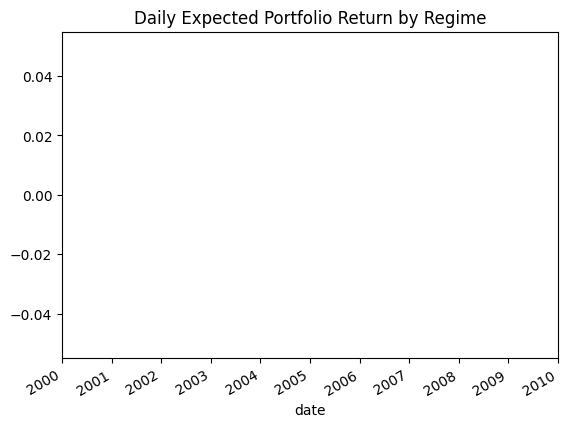

In [41]:
daily_expected_returns.plot(title="Daily Expected Portfolio Return by Regime")

In [42]:
regime_series.unique()

array([      nan, 20917.867, 21111.6  , 21397.938, 21717.171, 21933.217,
       21751.238, 19958.291, 21704.437, 22087.16 , 22680.693, 23425.91 ,
       23982.379, 24813.6  , 25250.347, 25861.292, 26336.304, 26770.514,
       27216.445, 27530.055, 28074.846, 28424.722, 28708.161, 29147.044,
       29511.664, 29825.182, 30042.113, 30485.729])

In [46]:
import matplotlib.pyplot as plt

plt.plot(portfolio_values)
plt.title("Simulated Portfolio Value Over Time")
plt.xlabel("Time Step")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.show()

NameError: name 'portfolio_values' is not defined

In [44]:
daily_expected_returns.head()
daily_expected_returns.isna().sum()

np.int64(3710)

In [45]:
type(np.int64(3710))         # <class 'numpy.int64'>
int(np.int64(3710))          # Converts to native Python int

3710

In [47]:
initial_value = 20000
portfolio_values = initial_value * (1 + daily_expected_returns).cumprod()

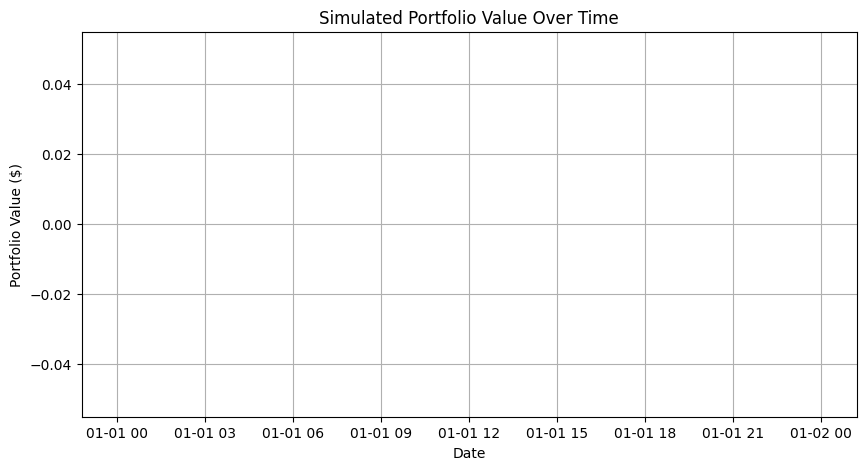

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(portfolio_values)
plt.title("Simulated Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.show()

In [49]:
daily_expected_returns.head()
daily_expected_returns.isna().sum()

np.int64(3710)

In [50]:
initial_value = 20000
portfolio_values = initial_value * (1 + daily_expected_returns.fillna(0)).cumprod()


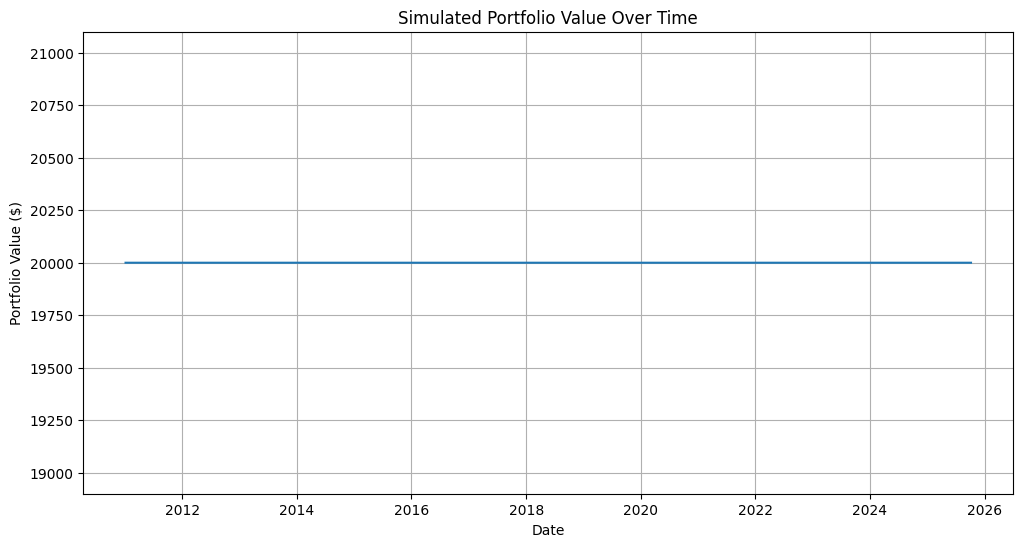

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values)
plt.title("Simulated Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.show()


In [52]:
daily_expected_returns.describe()
daily_expected_returns.value_counts().head()

Series([], Name: count, dtype: int64)

In [53]:
regime_series.unique()

array([      nan, 20917.867, 21111.6  , 21397.938, 21717.171, 21933.217,
       21751.238, 19958.291, 21704.437, 22087.16 , 22680.693, 23425.91 ,
       23982.379, 24813.6  , 25250.347, 25861.292, 26336.304, 26770.514,
       27216.445, 27530.055, 28074.846, 28424.722, 28708.161, 29147.044,
       29511.664, 29825.182, 30042.113, 30485.729])

In [54]:
portfolio_series = pd.Series(portfolio_values, index=some_date_index)

NameError: name 'some_date_index' is not defined

In [55]:
len(portfolio_values)

3710

In [56]:
portfolio_series.plot(title="Simulated Portfolio Value Over Time", figsize=(12, 6))

NameError: name 'portfolio_series' is not defined

In [57]:
date_index = pd.date_range(start="2011-01-01", periods=3710, freq="D")

In [58]:
portfolio_series = pd.Series(portfolio_values, index=date_index)

<Axes: title={'center': 'Simulated Portfolio Value Over Time'}>

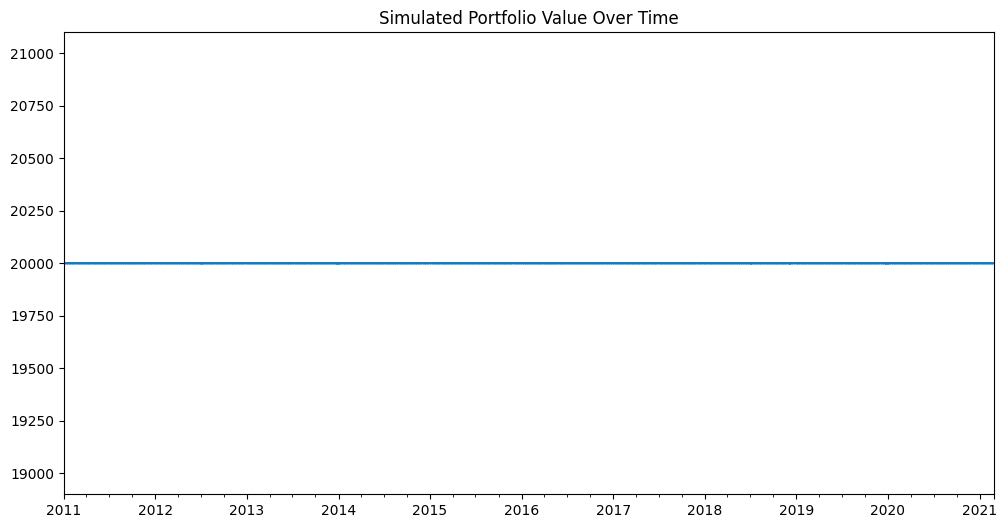

In [59]:
portfolio_series.plot(title="Simulated Portfolio Value Over Time", figsize=(12, 6))

In [60]:
regime_series.unique()

array([      nan, 20917.867, 21111.6  , 21397.938, 21717.171, 21933.217,
       21751.238, 19958.291, 21704.437, 22087.16 , 22680.693, 23425.91 ,
       23982.379, 24813.6  , 25250.347, 25861.292, 26336.304, 26770.514,
       27216.445, 27530.055, 28074.846, 28424.722, 28708.161, 29147.044,
       29511.664, 29825.182, 30042.113, 30485.729])

In [62]:
date_index = pd.date_range(start="2011-01-01", periods=28, freq="ME")

<Axes: title={'center': 'Simulated Portfolio Value Over Time'}>

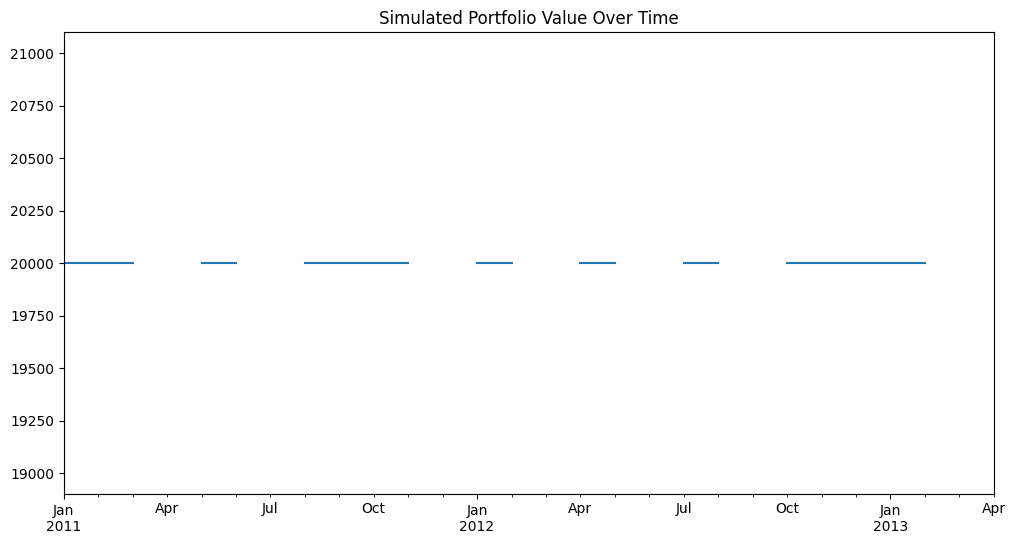

In [63]:
portfolio_series = pd.Series(portfolio_values, index=date_index)

portfolio_series.plot(title="Simulated Portfolio Value Over Time", figsize=(12, 6))

In [64]:
mean_matrix = pd.DataFrame({
    "SP500": [0.000372, 0.000491],
    "VIX":   [0.027570, 0.003028],
    "10Y":   [-0.001404, 0.000012]
}, index=["Expansion", "Recession"])

portfolio_weights = {
    "Expansion": {"SP500": 0.6, "VIX": 0.2, "10Y": 0.2},
    "Recession": {"SP500": 0.3, "VIX": 0.4, "10Y": 0.3}
}

expected_returns = {
    regime: sum(mean_matrix.loc[regime][ticker] * weight
                for ticker, weight in weights.items())
    for regime, weights in portfolio_weights.items()
}

In [65]:
regime_series = regime_series.astype(str).str.strip().str.capitalize()

In [66]:
daily_expected_returns = regime_series.map(expected_returns)

In [67]:
daily_expected_returns.describe()
daily_expected_returns.value_counts()

Series([], Name: count, dtype: int64)

In [68]:
regime_series.unique()

array(['Nan', '20917.867', '21111.6', '21397.938', '21717.171',
       '21933.217', '21751.238', '19958.291', '21704.437', '22087.16',
       '22680.693', '23425.91', '23982.379', '24813.6', '25250.347',
       '25861.292', '26336.304', '26770.514', '27216.445', '27530.055',
       '28074.846', '28424.722', '28708.161', '29147.044', '29511.664',
       '29825.182', '30042.113', '30485.729'], dtype=object)

In [69]:
regime_series = regime_series.astype(str).str.strip().str.capitalize()

In [70]:
expected_returns.keys()

dict_keys(['Expansion', 'Recession'])

In [71]:
dict_keys(['Expansion', 'Recession'])

NameError: name 'dict_keys' is not defined

In [72]:
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[71], line 1
----> 1 dict_keys(['Expansion', 'Recession'])

NameError: name 'dict_keys' is not defined

SyntaxError: invalid syntax (4229465784.py, line 1)

In [73]:
expected_returns.keys()

dict_keys(['Expansion', 'Recession'])

In [74]:
list(expected_returns.keys())

['Expansion', 'Recession']

In [75]:
for key in expected_returns:
    print(key, expected_returns[key])

Expansion 0.0054564
Recession 0.0013621


In [76]:
regime_series = regime_series.astype(str).str.strip().str.capitalize()

In [77]:
daily_expected_returns = regime_series.map(expected_returns)

In [78]:
daily_expected_returns.describe()
daily_expected_returns.value_counts()
daily_expected_returns.isna().sum()

np.int64(3710)

In [79]:
pd.date_range(start="2011-01-01", periods=int(np.int64(3710)), freq="D")

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20',
               '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24',
               '2021-02-25', '2021-02-26'],
              dtype='datetime64[ns]', length=3710, freq='D')

In [80]:
portfolio_series = pd.Series(portfolio_values, index=date_index)

<Axes: title={'center': 'Simulated Portfolio Value Over Time'}>

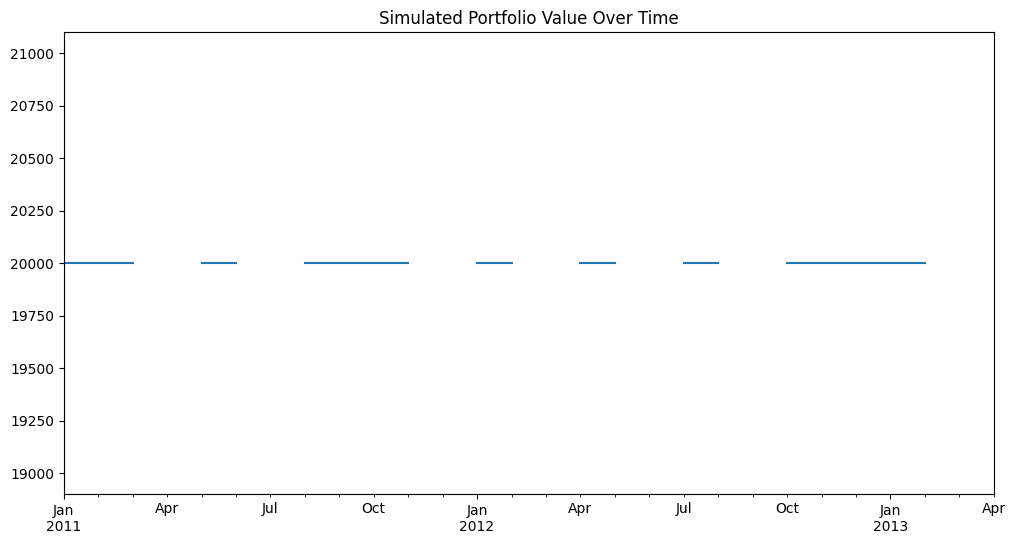

In [81]:
portfolio_series.plot(title="Simulated Portfolio Value Over Time", figsize=(12, 6))

<Axes: title={'center': 'Simulated Portfolio Value Over Time'}>

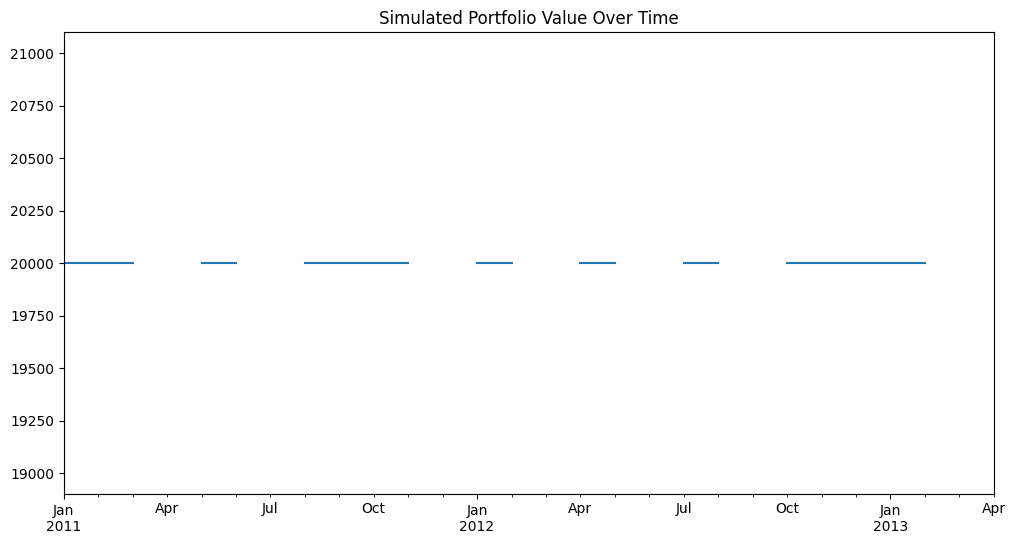

In [82]:
portfolio_series.plot(title="Simulated Portfolio Value Over Time", figsize=(12, 6))

In [83]:
regime_series.astype(str).str.strip().str.capitalize().value_counts()

GDP
Nan          2076
22087.16       64
21933.217      64
21717.171      64
21704.437      64
26336.304      64
24813.6        64
29511.664      64
29825.182      64
23982.379      64
20917.867      63
23425.91       63
29147.044      63
28074.846      63
28424.722      63
19958.291      63
21397.938      63
26770.514      63
21751.238      62
27216.445      62
27530.055      62
25861.292      62
25250.347      62
21111.6        61
22680.693      61
28708.161      61
30042.113      60
30485.729       1
Name: count, dtype: int64

In [84]:
regime_series = regime_series.astype(str).str.strip().str.capitalize()

In [85]:
regime_series = regime_series.astype(str).str.strip().str.capitalize()

In [86]:
expected_returns = {
    "Expansion": 0.0054564,
    "Recession": 0.0013621
}

In [87]:
daily_expected_returns = regime_series.map(expected_returns)

In [88]:
daily_expected_returns.describe()
daily_expected_returns.value_counts()
daily_expected_returns.isna().sum()

np.int64(3710)

In [89]:
portfolio_values = 20000 * (1 + daily_expected_returns.fillna(0)).cumprod()
date_index = pd.date_range(start="2011-01-01", periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=date_index)

<Axes: title={'center': 'Simulated Portfolio Value Over Time'}>

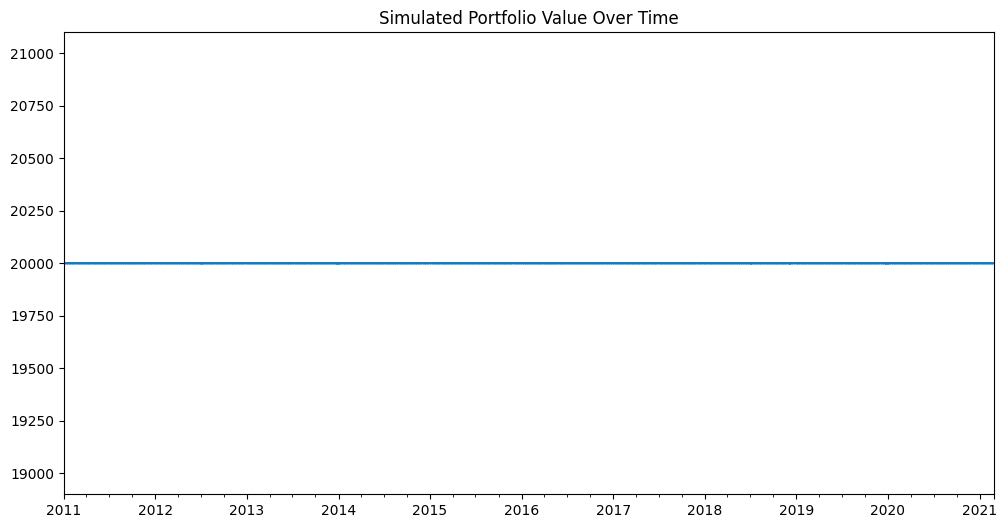

In [90]:
portfolio_series.plot(title="Simulated Portfolio Value Over Time", figsize=(12, 6))

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("output/etf_regime_summary.csv", header=None)
print(df.head(10))

In [ ]:
df = pd.read_csv("data/daily_returns_labeled.csv")
print(df["Regime"].value_counts())
print(df.head())